# Train First Model

In [18]:
import warnings

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor

%load_ext autoreload
%autoreload 2
from feature_engineering import *
from model_experimentation import *

warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
granularity = 'hour'
df = pd.read_parquet(f"./../../data/model_train/2022_06_20_wind_dataset_lags_central_tendency_dispersion_{granularity}.gzip")

In [3]:
# TODO: Remove first 24 hours of test.

In [13]:
def run_experiments(df,models=[LinearRegression(n_jobs=-1)],use_validation=False,target_time_windows=['1h','3h','6h'],target_name='WIND_SPEED_ms'):
    
    experiment_tracking = []
    for target_time_window in target_time_windows:
        if use_validation:
            datasets = setup_datasets_for_experiment(df,test_year=2020,validation_year=2019,target_format=target_time_window,target_name=target_name)
            X_train_norm,y_train,X_validation_norm,y_validation,X_test_norm,y_test = datasets
        else:
            datasets = setup_datasets_for_experiment(df,test_year=2020,validation_year=None,target_format=target_time_window,target_name=target_name)
            X_train_norm,y_train,X_test_norm,y_test = datasets
            
        max = y_train.values.max()
        min = 0

        for model in models:  
            model_name = type(model).__name__
            print("--------------------------------------------------------------------------------")      
            print("--------------------------------------------------------------------------------")
            print(f"Running experiment for {model_name} to predict target {target_name} {target_time_window} ahead.")   
            print("Train size:",X_train_norm.shape)   
            print("Test size:",X_test_norm.shape)   
            model.fit(X_train_norm,y_train)

            mae_train,rmse_train = evaluate_predictions(y_pred=model.predict(X_train_norm).ravel(),y_true=y_train,max_prediction=max,min_prediction=min,set=f'Train - Target {target_time_window} ahead')
            mae_val,rmse_val = None,None
            if use_validation:
                mae_val,rmse_val = evaluate_predictions(y_pred=model.predict(X_validation_norm).ravel(),y_true=y_validation,max_prediction=max,min_prediction=min,set=f'Validation - Target {target_time_window} ahead')
            mae_test,rmse_test = evaluate_predictions(y_pred=model.predict(X_test_norm).ravel(),y_true=y_test,max_prediction=max,min_prediction=min,set=f'Test - Target {target_time_window} ahead')
            
            experiment_params = {
                'TARGET_NAME':target_name,
                'TARGET_TIME_WINDOW':target_time_window,
                'MODEL_NAME':model_name,
                'RMSE_TRAIN':rmse_train,
                'MAE_TRAIN':mae_train,
                'RMSE_VALIDATION':rmse_val,
                'MAE_VALIDATION':mae_val,
                'RMSE_TEST':rmse_test,
                'MAE_TEST':mae_test,
            }
            
            experiment_tracking.append(experiment_params)
            print("--------------------------------------------------------------------------------")      
            print("--------------------------------------------------------------------------------\n\n")
    
    df_experiment_tracking = pd.DataFrame(experiment_tracking)
    return df_experiment_tracking

## Experimenting Linear Regression, Random Forest and Gradient Boosting

train: 2018,2019

test: 2020

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 1h ahead.
Train size: (80823, 429)
Test size: (40182, 429)
Target distribution [mean(std)]:  2.35 (1.64)
Prediction distribution [mean(std)]:  2.36 (1.45)
MAE 0.51
RMSE 0.74



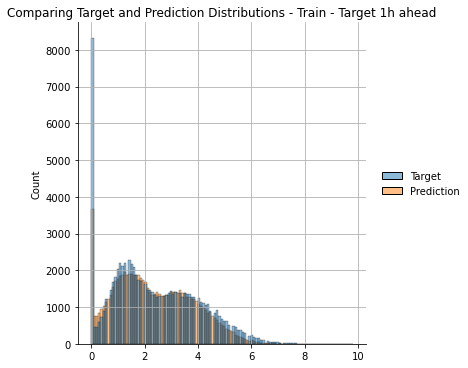

Target distribution [mean(std)]:  2.12 (1.60)
Prediction distribution [mean(std)]:  2.13 (1.40)
MAE 0.56
RMSE 0.84



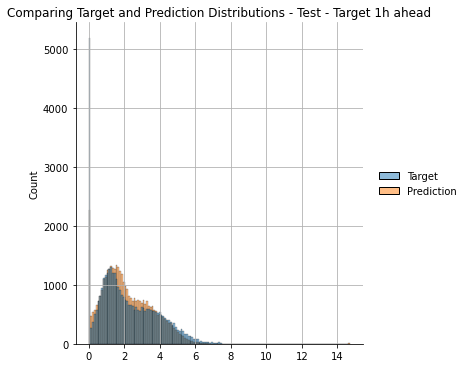

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 1h ahead.
Train size: (80823, 429)
Test size: (40182, 429)
Target distribution [mean(std)]:  2.35 (1.64)
Prediction distribution [mean(std)]:  2.36 (1.45)
MAE 0.51
RMSE 0.74



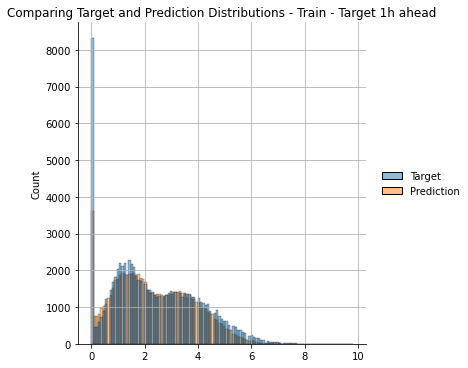

Target distribution [mean(std)]:  2.12 (1.60)
Prediction distribution [mean(std)]:  2.12 (1.38)
MAE 0.55
RMSE 0.81



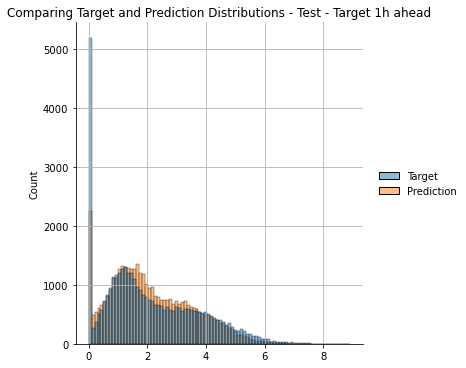

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 1h ahead.
Train size: (80823, 429)
Test size: (40182, 429)
Target distribution [mean(std)]:  2.35 (1.64)
Prediction distribution [mean(std)]:  2.35 (1.47)
MAE 0.46
RMSE 0.66



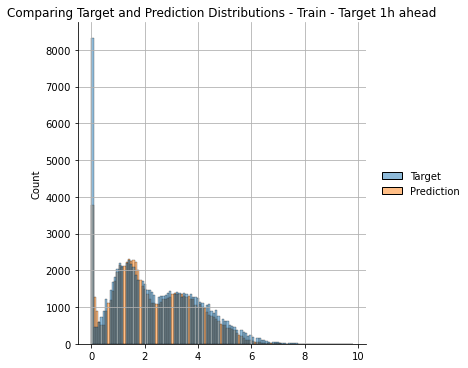

Target distribution [mean(std)]:  2.12 (1.60)
Prediction distribution [mean(std)]:  2.13 (1.40)
MAE 0.52
RMSE 0.79



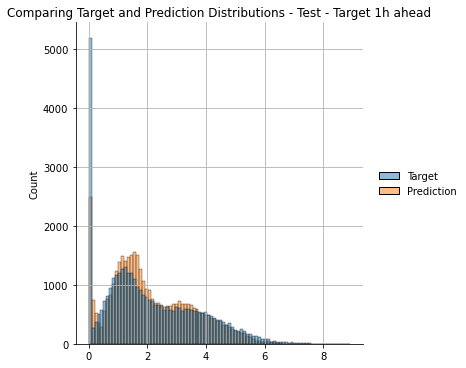

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 3h ahead.
Train size: (80805, 429)
Test size: (40181, 429)
Target distribution [mean(std)]:  2.35 (1.64)
Prediction distribution [mean(std)]:  2.35 (1.35)
MAE 0.65
RMSE 0.90



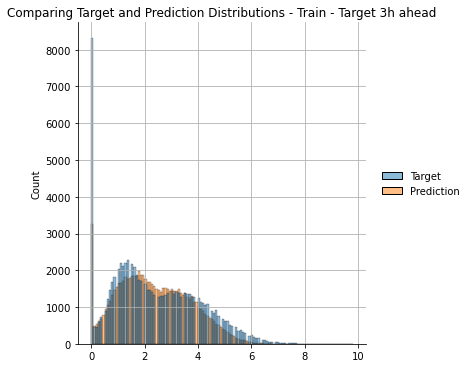

Target distribution [mean(std)]:  2.10 (1.59)
Prediction distribution [mean(std)]:  2.15 (1.32)
MAE 0.74
RMSE 1.06



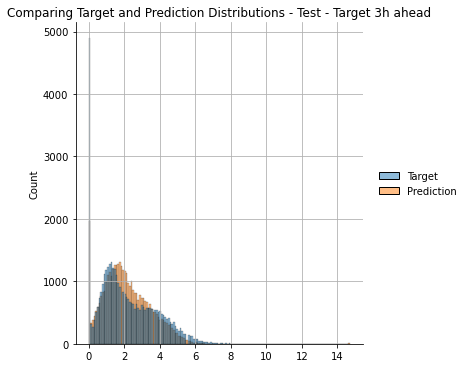

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 3h ahead.
Train size: (80805, 429)
Test size: (40181, 429)
Target distribution [mean(std)]:  2.35 (1.64)
Prediction distribution [mean(std)]:  2.36 (1.34)
MAE 0.65
RMSE 0.90



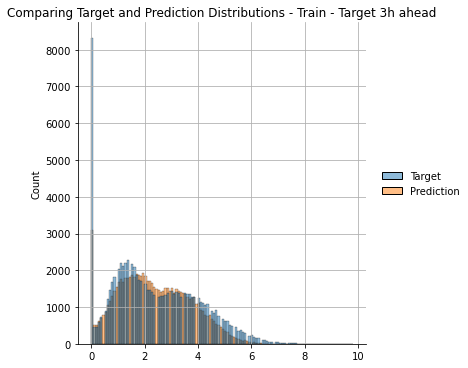

Target distribution [mean(std)]:  2.10 (1.59)
Prediction distribution [mean(std)]:  2.13 (1.28)
MAE 0.72
RMSE 1.00



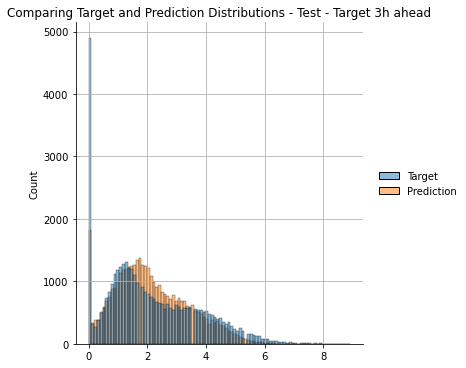

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 3h ahead.
Train size: (80805, 429)
Test size: (40181, 429)
Target distribution [mean(std)]:  2.35 (1.64)
Prediction distribution [mean(std)]:  2.35 (1.40)
MAE 0.55
RMSE 0.77



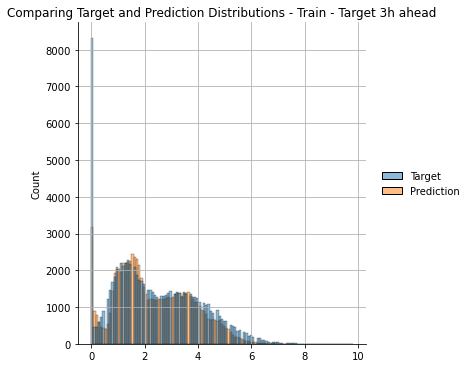

Target distribution [mean(std)]:  2.10 (1.59)
Prediction distribution [mean(std)]:  2.13 (1.32)
MAE 0.65
RMSE 0.93



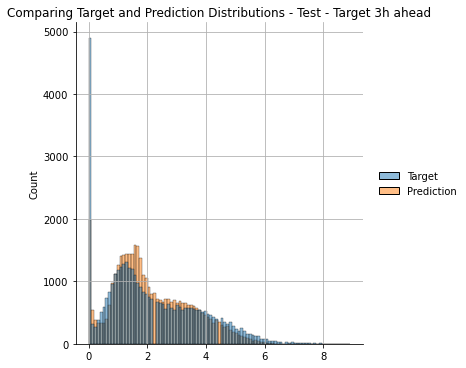

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LinearRegression to predict target WIND_SPEED_ms 6h ahead.
Train size: (80781, 429)
Test size: (40175, 429)
Target distribution [mean(std)]:  2.35 (1.64)
Prediction distribution [mean(std)]:  2.36 (1.29)
MAE 0.71
RMSE 0.98



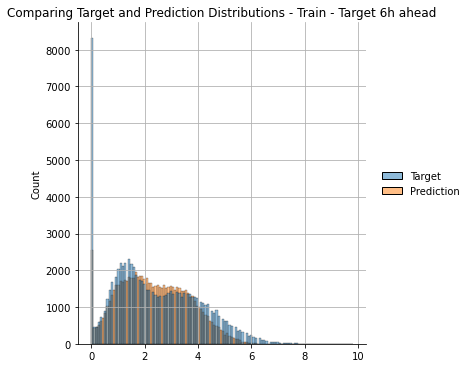

Target distribution [mean(std)]:  2.09 (1.59)
Prediction distribution [mean(std)]:  2.15 (1.24)
MAE 0.81
RMSE 1.13



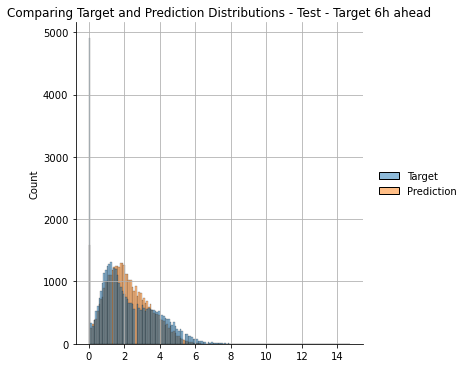

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for Ridge to predict target WIND_SPEED_ms 6h ahead.
Train size: (80781, 429)
Test size: (40175, 429)
Target distribution [mean(std)]:  2.35 (1.64)
Prediction distribution [mean(std)]:  2.36 (1.29)
MAE 0.71
RMSE 0.98



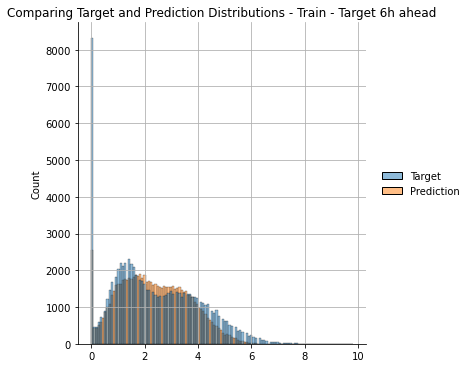

Target distribution [mean(std)]:  2.09 (1.59)
Prediction distribution [mean(std)]:  2.16 (1.23)
MAE 0.80
RMSE 1.10



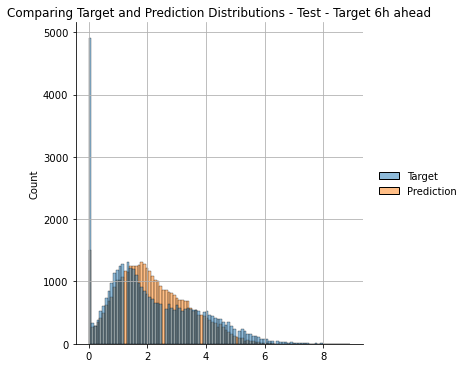

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Running experiment for LGBMRegressor to predict target WIND_SPEED_ms 6h ahead.
Train size: (80781, 429)
Test size: (40175, 429)
Target distribution [mean(std)]:  2.35 (1.64)
Prediction distribution [mean(std)]:  2.35 (1.35)
MAE 0.59
RMSE 0.82



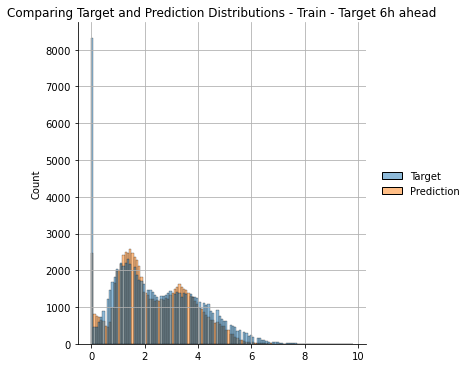

Target distribution [mean(std)]:  2.09 (1.59)
Prediction distribution [mean(std)]:  2.13 (1.27)
MAE 0.72
RMSE 1.01



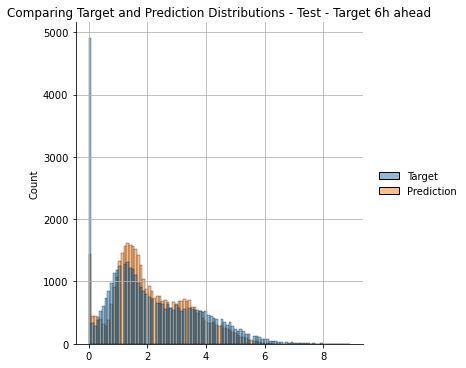

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------




In [16]:
targets_to_drop = ['WIND_SPEED_ms_target_3h','WIND_SPEED_ms_target_6h','WIND_SPEED_ms_target_1h', 
                    'WIND_DIRECTION_degrees_target_1h', 'WIND_DIRECTION_degrees_target_3h', 
                    'WIND_DIRECTION_degrees_target_6h', 'WIND_MAX_GUNS_ms_target_1h',
                    'WIND_MAX_GUNS_ms_target_3h', 'WIND_MAX_GUNS_ms_target_6h']
df_experiment_tracking = run_experiments(df,
                models=[LinearRegression(n_jobs=-1),
                Ridge(),
                LGBMRegressor()],
                use_validation=False,
                target_time_windows=['1h','3h','6h'],
                target_name='WIND_SPEED_ms')
                
                # RandomForestRegressor(n_estimators=200,max_depth=10,min_samples_split=5,criterion='absolute_error'),
                # GradientBoostingRegressor(loss='absolute_error',n_estimators=200)],

In [17]:
df_experiment_tracking

,TARGET_NAME,TARGET_TIME_WINDOW,MODEL_NAME,RMSE_TRAIN,MAE_TRAIN,RMSE_VALIDATION,MAE_VALIDATION,RMSE_TEST,MAE_TEST
0,WIND_SPEED_ms,1h,LinearRegression,0.741675,0.510095,None,None,0.837716,0.558009
1,WIND_SPEED_ms,1h,Ridge,0.743508,0.510858,None,None,0.811560,0.551952
2,WIND_SPEED_ms,1h,LGBMRegressor,0.657706,0.456524,None,None,0.787880,0.523851
3,WIND_SPEED_ms,3h,LinearRegression,0.903702,0.650601,None,None,1.060680,0.743472
4,WIND_SPEED_ms,3h,Ridge,0.901050,0.648356,None,None,1.001630,0.717451
5,WIND_SPEED_ms,3h,LGBMRegressor,0.767341,0.549164,None,None,0.931768,0.649006
6,WIND_SPEED_ms,6h,LinearRegression,0.975288,0.712498,None,None,1.129177,0.814438
7,WIND_SPEED_ms,6h,Ridge,0.978337,0.714353,None,None,1.103402,0.802172
8,WIND_SPEED_ms,6h,LGBMRegressor,0.818579,0.593058,None,None,1.014234,0.721310


In [ ]:
# from ngboost import NGBRegressor
# from ngboost.distns import Normal

# ngb = NGBRegressor(Dist=Normal).fit(X_train, y_train)
# Y_preds = ngb.predict(X_validation)
# Y_dists = ngb.pred_dist(X_validation)

# test_MSE = mean_squared_error(Y_preds, y_validation)
# print("Validation MSE", test_MSE)

# test_NLL = -Y_dists.logpdf(y_validation.flatten()).mean()
# print("Validation NLL", test_NLL)